In [2]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
train_path = 'D:\plantvillage_deeplearning_paper_dataset\plantvillage_deeplearning_paper_dataset\color'
test_path = 'images/test/'
batch_size = 32
image_size = 128
num_class = 38


In [4]:

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )


train_generator = train_datagen.flow_from_directory(
                        directory=train_path,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        subset="training",
                        shuffle=True)

validation_generator = train_datagen.flow_from_directory(
                        directory=train_path,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        subset="validation",
                        shuffle=True)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [5]:
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

#Load the VGG model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
x_batch, y_batch = train_generator.next()

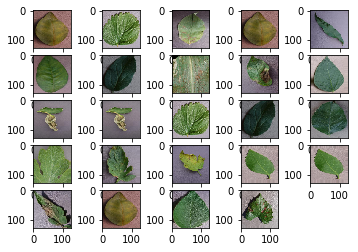

In [ ]:
fig=plt.figure()
columns = 5
rows = 5
for i in range(1, columns*rows):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.int)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()

In [ ]:
#Load the VGG model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

print(base_model.summary())

    # Freeze the layers 
# for layer in base_model.layers:
#     layer.trainable = True
 
# # Create the model
model = keras.models.Sequential()

# # Add the vgg convolutional base model
model.add(base_model)
 
# # Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
 
# # Show a summary of the model. Check the number of trainable parameters    
print(model.summary())
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 63, 63, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 63, 63, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 38)                38950     
Total params: 31,280,966
Trainable params: 31,246,534
Non-trainable params: 34,432
_________________________________________________________________
None


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
 102/1358 [=>............................] - ETA: 34:51 - loss: 3.9112 - acc: 0.1042

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [16]:
model.save('scratch_model.h5')
print("Model saved")

Model saved


In [ ]:
!conda install h5py


In [ ]:
model.metrics[1]